Imported important libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


Imported Data

In [2]:
train_data = 'datasets/train/train_text_seq.csv'
test_data='datasets/test/test_text_seq.csv'
val_data='datasets/valid/valid_text_seq.csv'
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)
df_val= pd.read_csv(val_data)
df_train.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


Modified Data

In [3]:
def split_str(df):
    df_split = df['input_str'].apply(lambda x: pd.Series(list(x)))
    df_split = df_split.replace('', pd.NA).dropna(axis=1, how='all')
    return df_split

In [4]:
train_str = split_str(df_train)
test_str = split_str(df_test)
val_str = split_str(df_val)

Applied One Hot Encoding and flattneing

In [5]:

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
train_encoded = encoder.fit_transform(train_str)
test_encoded = encoder.transform(test_str)
val_encoded = encoder.transform(val_str)

train_encoded_flatten = train_encoded.ravel()
test_encoded_flatten = test_encoded.ravel()
val_encoded_flatten = val_encoded.ravel()


train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out())
test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out())
val_encoded_df = pd.DataFrame(val_encoded, columns=encoder.get_feature_names_out())

train_encoded_flatten = train_encoded_df.values.ravel()  
test_encoded_flatten = test_encoded_df.values.ravel()
val_encoded_flatten = val_encoded_df.values.ravel()

df_encoded2 = pd.concat([df_train, train_encoded_df], axis=1)
df_test_enc = pd.concat([df_test, test_encoded_df], axis=1)
df_val_enc = pd.concat([df_val, val_encoded_df], axis=1)

Finally the input data is ready to be used by the models

In [29]:
X_train_full = df_encoded2.drop(columns=['input_str', 'label'])
y_train_full = df_encoded2['label']
X_val = df_val_enc.drop(columns=['input_str','label'])
y_val = df_val_enc['label']
X_test = df_test_enc.drop(columns=['input_str'])
percentages = list(range(5, 105, 5))

Function to run various models

In [7]:
def train_validate_model(model, X_train, y_train):
  results_list = []

  for percentage in percentages:
      num_samples = int((percentage / 100) * len(X_train_full))
      X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=num_samples, random_state=42)
      model.fit(X_train_sample, y_train_sample)
      y_val_pred = model.predict(X_val)
      report = classification_report(y_val, y_val_pred, output_dict=True)
      accuracy = accuracy_score(y_val, y_val_pred)

      results_list.append({
        'Percentage of Training Data': percentage,
        'Accuracy': accuracy,
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
      })

  return pd.DataFrame(results_list)

Function to plot scores for various models

In [8]:
def plot_results(model,results):
  plt.figure(figsize=(15, 5))
  plt.plot(results['Percentage of Training Data'], results['Accuracy'], marker='o', label='Accuracy')
  plt.plot(results['Percentage of Training Data'], results['Precision'], marker='o', label='Precision')
  plt.plot(results['Percentage of Training Data'], results['Recall'], marker='o', label='Recall')
  plt.plot(results['Percentage of Training Data'], results['F1-Score'], marker='o', label='F1-Score')
  plt.title(model+' Performance Metrics')
  plt.xlabel('Percentage of Training Data')
  plt.ylabel('Score')
  plt.xticks(results['Percentage of Training Data'])
  plt.legend()
  plt.grid()
  plt.show()

Logistic Regression

In [9]:
lr_model=LogisticRegression()
lr_result=train_validate_model(lr_model, X_train_full, y_train_full)
print(lr_result)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.517382   0.519806  0.517382  0.516077
1                            10  0.548057   0.548778  0.548057  0.548140
2                            15  0.588957   0.588515  0.588957  0.588181
3                            20  0.601227   0.600854  0.601227  0.600474
4                            25  0.605317   0.604969  0.605317  0.604714
5                            30  0.625767   0.625575  0.625767  0.624912
6                            35  0.631902   0.631664  0.631902  0.631402
7                            40  0.648262   0.648067  0.648262  0.647893
8                            45  0.627812   0.627662  0.627812  0.626883
9                            50  0.633947   0.633727  0.633947  0.633388
10                           55  0.625767   0.625534  0.625767  0.625060
11                           60  0.629857   0.629619  0.629857  0.629292
12                           65  0.617587   0.61731

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


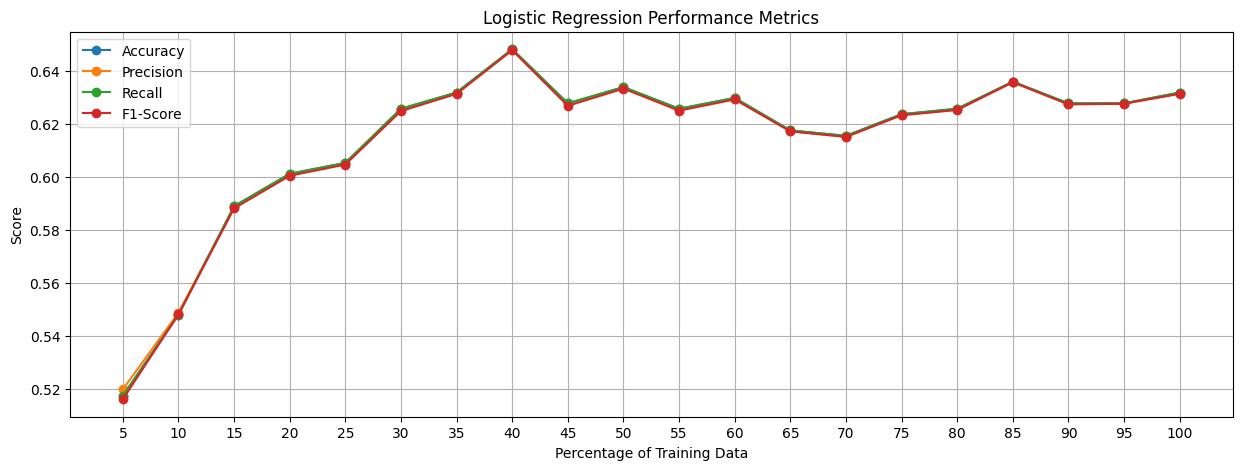

In [10]:
plot_results('Logistic Regression',lr_result)

Decision Tree Classifier

In [11]:
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_result = train_validate_model(dtc_model, X_train_full, y_train_full)
print(dtc_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.492843   0.495584  0.492843  0.489806
1                            10  0.537832   0.539249  0.537832  0.537639
2                            15  0.527607   0.527214  0.527607  0.527303
3                            20  0.539877   0.540057  0.539877  0.539947
4                            25  0.586912   0.587420  0.586912  0.587009
5                            30  0.546012   0.545436  0.546012  0.545395
6                            35  0.564417   0.564364  0.564417  0.564388
7                            40  0.566462   0.566027  0.566462  0.566008
8                            45  0.564417   0.563944  0.564417  0.563895
9                            50  0.550102   0.550471  0.550102  0.550204
10                           55  0.586912   0.586912  0.586912  0.586912
11                           60  0.539877   0.540894  0.539877  0.539877
12                           65  0.609407   0.60908

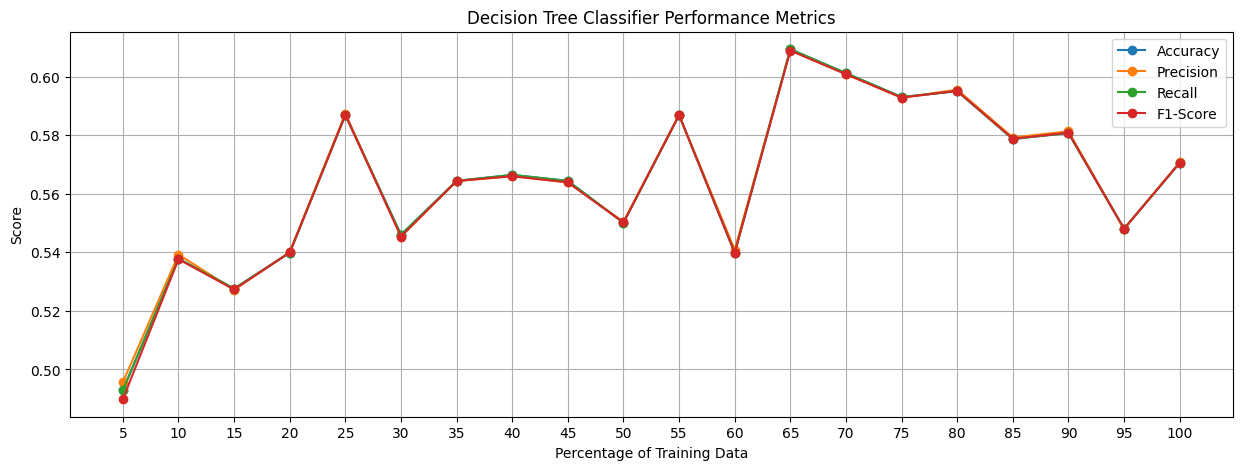

In [12]:
plot_results('Decision Tree Classifier',dtc_result)

Random Forest Classifier

In [13]:
rfc_model = RandomForestClassifier()
rfc_result = train_validate_model(rfc_model, X_train_full, y_train_full)
print(rfc_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.517382   0.531911  0.517382  0.490723
1                            10  0.529652   0.530432  0.529652  0.529723
2                            15  0.568507   0.568001  0.568507  0.565316
3                            20  0.533742   0.532863  0.533742  0.532579
4                            25  0.556237   0.556815  0.556237  0.556337
5                            30  0.609407   0.609077  0.609407  0.608810
6                            35  0.586912   0.586594  0.586912  0.584816
7                            40  0.615542   0.615497  0.615542  0.614027
8                            45  0.593047   0.592871  0.593047  0.590858
9                            50  0.635992   0.636090  0.635992  0.634746
10                           55  0.609407   0.609276  0.609407  0.609319
11                           60  0.625767   0.625534  0.625767  0.625060
12                           65  0.609407   0.60913

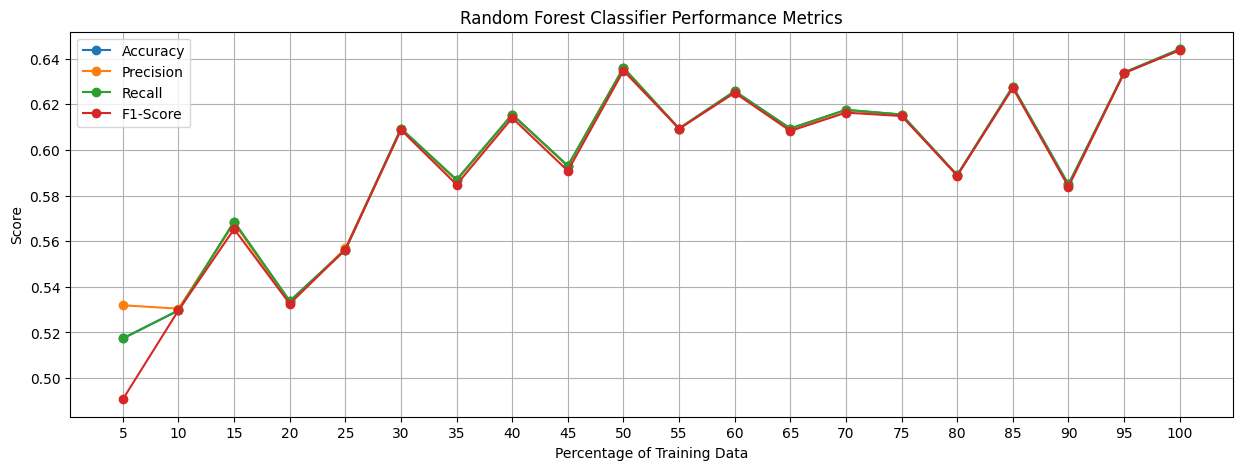

In [14]:
plot_results('Random Forest Classifier',rfc_result)

XGB Classifier

In [15]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_result = train_validate_model(xgb_model, X_train_full, y_train_full)
print(xgb_result)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [22:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.509202   0.512441  0.509202  0.506264
1                            10  0.548057   0.548001  0.548057  0.548027
2                            15  0.566462   0.566698  0.566462  0.566542
3                            20  0.586912   0.586728  0.586912  0.586781
4                            25  0.566462   0.566462  0.566462  0.566462
5                            30  0.588957   0.589391  0.588957  0.589053
6                            35  0.629857   0.629614  0.629857  0.629522
7                            40  0.580777   0.580318  0.580777  0.580137
8                            45  0.611452   0.611362  0.611452  0.611397
9                            50  0.605317   0.605481  0.605317  0.605376
10                           55  0.603272   0.604118  0.603272  0.603332
11                           60  0.621677   0.621631  0.621677  0.621652
12                           65  0.613497   0.61378

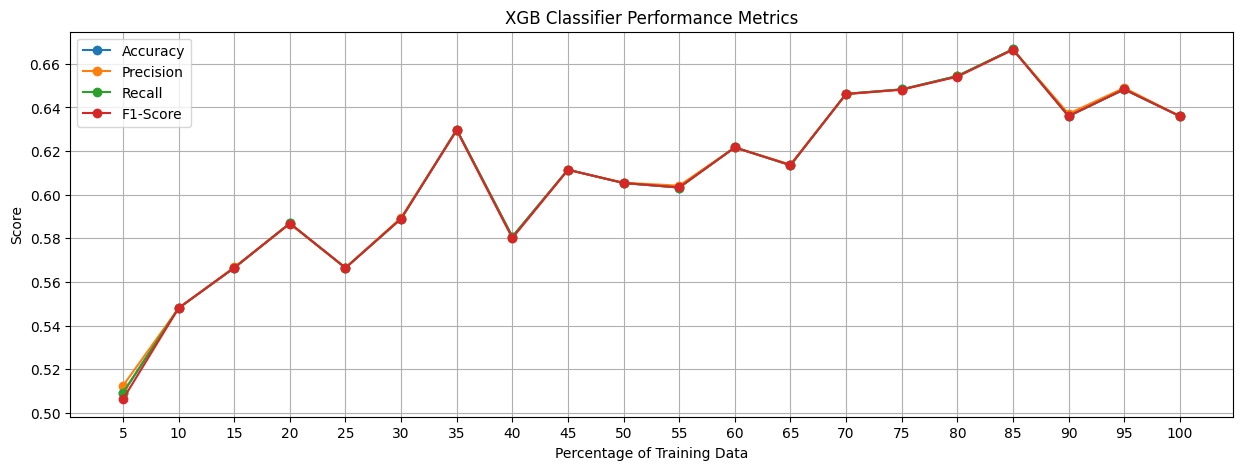

In [16]:
plot_results('XGB Classifier',xgb_result)

SVM Linear Classifier

In [17]:
svm_linear_model = SVC(kernel='linear', random_state=42)
svm_linear_result = train_validate_model(svm_linear_model, X_train_full, y_train_full)
print(svm_linear_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.519427   0.521629  0.519427  0.518430
1                            10  0.560327   0.562347  0.560327  0.559867
2                            15  0.570552   0.570195  0.570552  0.570221
3                            20  0.611452   0.611362  0.611452  0.611397
4                            25  0.615542   0.615380  0.615542  0.615420
5                            30  0.635992   0.635842  0.635992  0.635234
6                            35  0.623722   0.623452  0.623722  0.623210
7                            40  0.648262   0.648129  0.648262  0.647662
8                            45  0.627812   0.627819  0.627812  0.626538
9                            50  0.629857   0.629758  0.629857  0.628852
10                           55  0.617587   0.617347  0.617587  0.617340
11                           60  0.615542   0.615251  0.615542  0.615139
12                           65  0.623722   0.62347

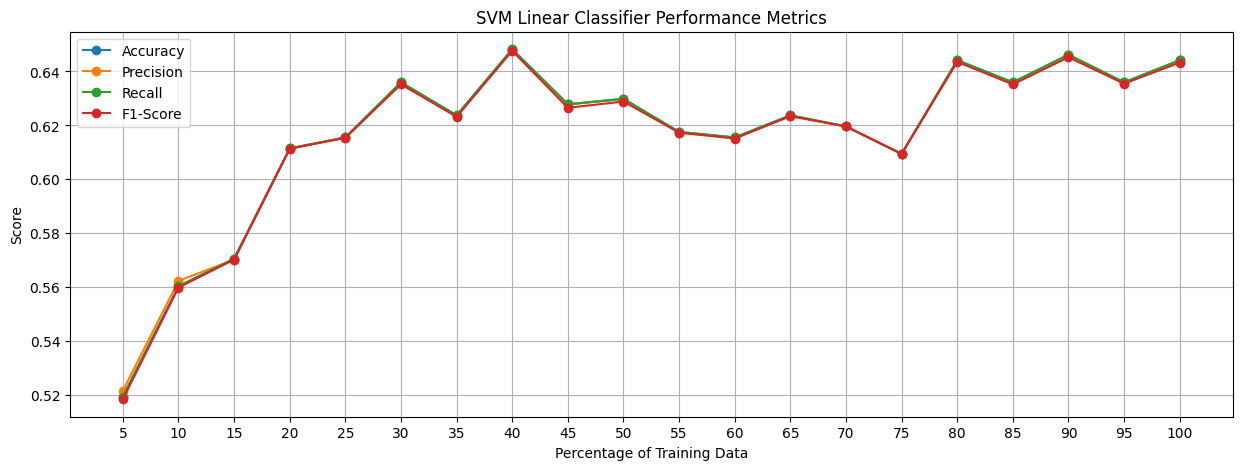

In [18]:
plot_results('SVM Linear Classifier',svm_linear_result)

SVM RBF Classifier

In [19]:
svm_rbf_model=SVC(kernel='rbf', random_state=42)
svm_rbf_result=train_validate_model(svm_rbf_model, X_train_full, y_train_full)
print(svm_rbf_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.533742   0.548180  0.533742  0.515076
1                            10  0.541922   0.541250  0.541922  0.541142
2                            15  0.535787   0.534962  0.535787  0.534727
3                            20  0.554192   0.553582  0.554192  0.553433
4                            25  0.566462   0.566829  0.566462  0.566560
5                            30  0.597137   0.597000  0.597137  0.597046
6                            35  0.605317   0.604984  0.605317  0.604844
7                            40  0.603272   0.603009  0.603272  0.601914
8                            45  0.582822   0.582323  0.582822  0.581781
9                            50  0.605317   0.605009  0.605317  0.604246
10                           55  0.593047   0.592625  0.593047  0.592117
11                           60  0.607362   0.607212  0.607362  0.605815
12                           65  0.605317   0.60526

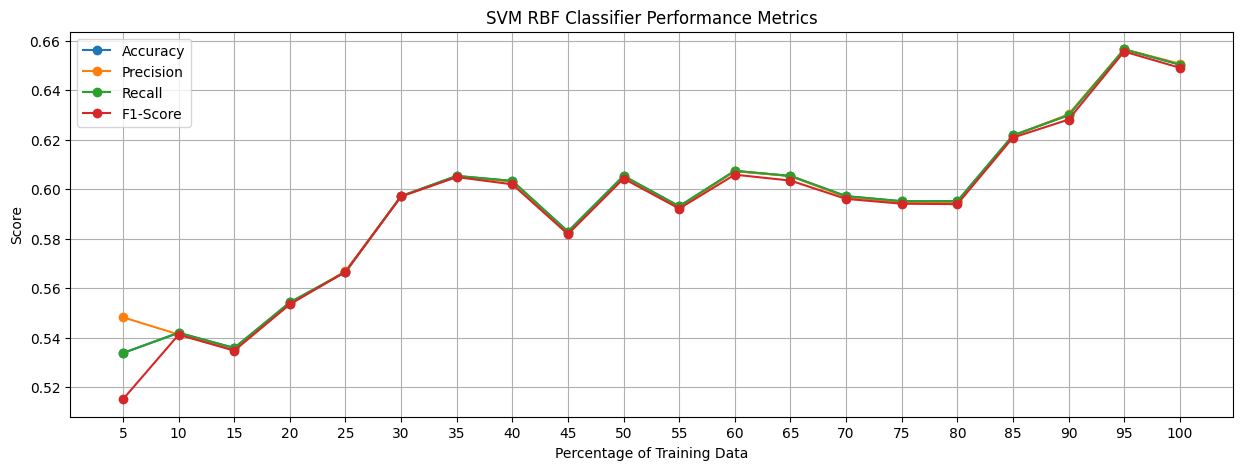

In [20]:
plot_results('SVM RBF Classifier',svm_rbf_result)

Naive Bayes Classifier

In [21]:
nb_model=GaussianNB()
nb_result=train_validate_model(nb_model, X_train_full, y_train_full)
print(nb_result)

    Percentage of Training Data  Accuracy  Precision    Recall  F1-Score
0                             5  0.550102   0.553510  0.550102  0.548454
1                            10  0.535787   0.555942  0.535787  0.509660
2                            15  0.537832   0.564900  0.537832  0.503952
3                            20  0.543967   0.564181  0.543967  0.521078
4                            25  0.568507   0.581593  0.568507  0.558681
5                            30  0.560327   0.576116  0.560327  0.546641
6                            35  0.566462   0.584262  0.566462  0.551966
7                            40  0.584867   0.603541  0.584867  0.572563
8                            45  0.568507   0.587022  0.568507  0.553739
9                            50  0.564417   0.583757  0.564417  0.548090
10                           55  0.578732   0.601178  0.578732  0.562587
11                           60  0.572597   0.593451  0.572597  0.556576
12                           65  0.574642   0.59459

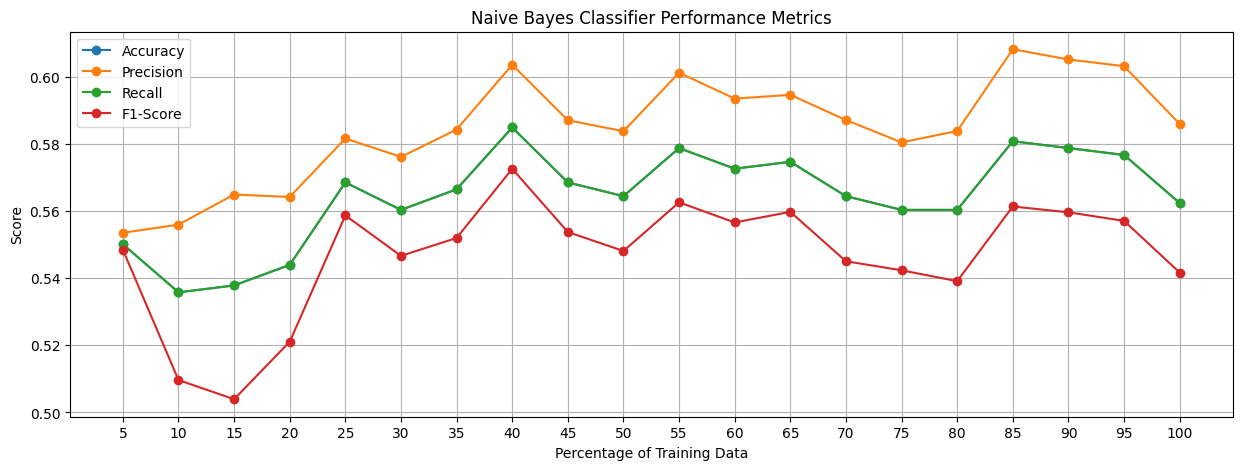

In [22]:
plot_results('Naive Bayes Classifier',nb_result)

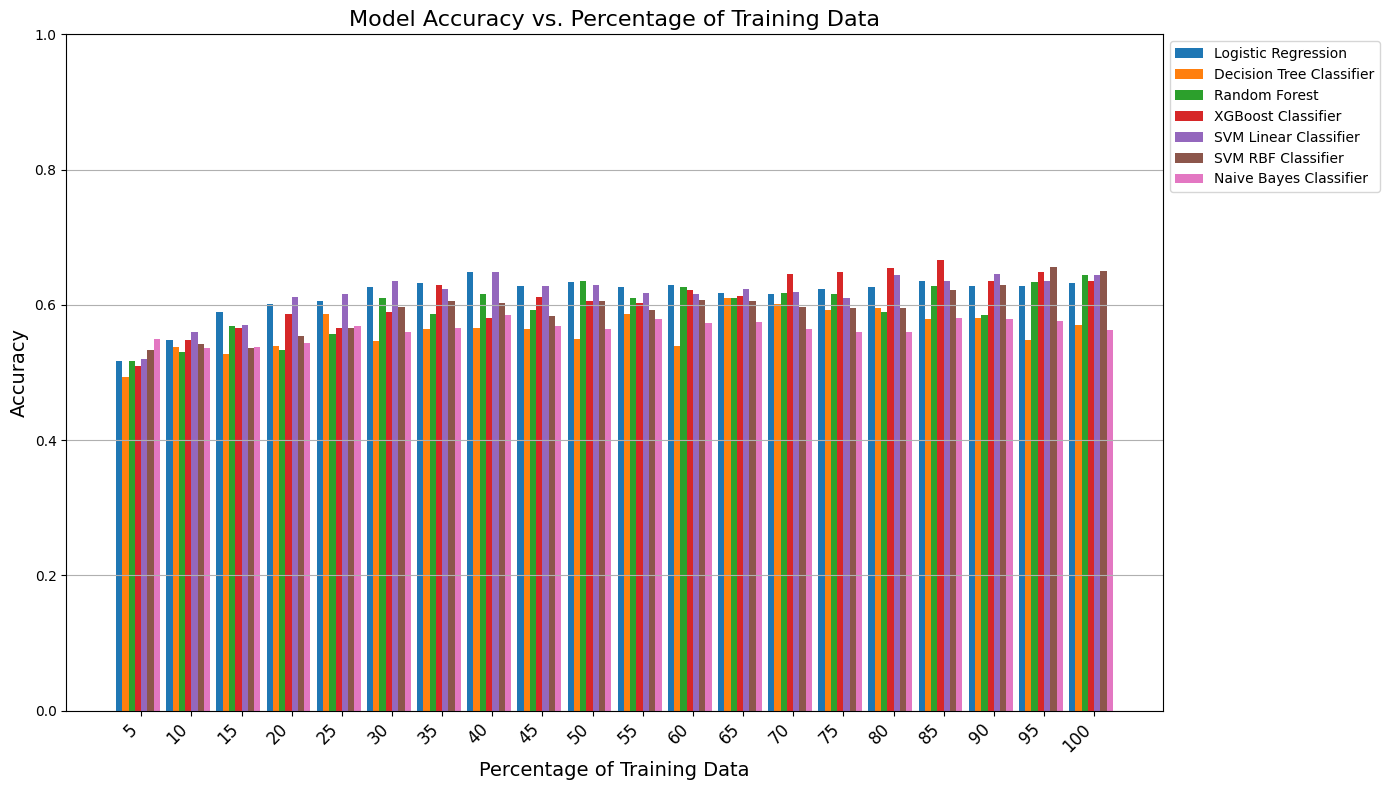

In [25]:
bar_width = 0.1 
num_bars = 7

x = np.arange(len(lr_result['Percentage of Training Data'])) * (num_bars + 1) * bar_width

plt.figure(figsize=(14, 8))
plt.bar(x - bar_width * 3.5, lr_result['Accuracy'], width=bar_width, label='Logistic Regression')
plt.bar(x - bar_width * 2.5, dtc_result['Accuracy'], width=bar_width, label='Decision Tree Classifier')
plt.bar(x - bar_width * 1.5, rfc_result['Accuracy'], width=bar_width, label='Random Forest')
plt.bar(x - bar_width * 0.5, xgb_result['Accuracy'], width=bar_width, label='XGBoost Classifier')
plt.bar(x + bar_width * 0.5, svm_linear_result['Accuracy'], width=bar_width, label='SVM Linear Classifier')
plt.bar(x + bar_width * 1.5, svm_rbf_result['Accuracy'], width=bar_width, label='SVM RBF Classifier')
plt.bar(x + bar_width * 2.5, nb_result['Accuracy'], width=bar_width, label='Naive Bayes Classifier')

plt.title('Model Accuracy vs. Percentage of Training Data', fontsize=16)
plt.xlabel('Percentage of Training Data', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(x, lr_result['Percentage of Training Data'], rotation=45, ha='right', fontsize=12)

plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [26]:

all_results = {
    'Logistic Regression': lr_result,
    'Decision Tree': dtc_result,
    'Random Forest': rfc_result,
    'XGBoost': xgb_result,
    'SVM Linear': svm_linear_result,
    'SVM RBF': svm_rbf_result,
    'Naive Bayes': nb_result,
}

combined_results = pd.concat(
    [df[['Percentage of Training Data', 'Accuracy']] for df in all_results.values()],
    keys=all_results.keys(), names=['Model', 'Index']).reset_index()

max_accuracy_row = combined_results.loc[combined_results['Accuracy'].idxmax()]

model_with_max_accuracy = max_accuracy_row['Model']
percentage_with_max_accuracy = max_accuracy_row['Percentage of Training Data']
max_accuracy = max_accuracy_row['Accuracy']

print(f"Model with the highest accuracy: {model_with_max_accuracy}")
print(f"Percentage of Training Data: {percentage_with_max_accuracy}%")
print(f"Highest accuracy: {max_accuracy:.4f}")


Model with the highest accuracy: XGBoost
Percentage of Training Data: 85%
Highest accuracy: 0.6667


In [32]:
x_train_split, _, y_train_split, _ = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(x_train_split, y_train_split)
y_test_pred = xgb_classifier.predict(X_test)
np.save("pred_deepfeat.txt", y_test_pred)

c:\Users\shiva\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
